<a href="https://colab.research.google.com/github/Eshashr/My-Projects/blob/main/DataMining_Titanic_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Titanic Decision Tree
In this assignment you will construct two decision trees from a data set based on the passenger manifest of the Titanic. The decision trees are attempting to predict survival given the known features of the passengers. You are given initial code to read in the dataset and prep it for your work.

You will be able to refer to other notebooks that we have used in class for help with your code. Particularly, the two Decision Tree notebooks and the Cross Validation notebooks (for the performance measures, this assignment doesn't use cross validation).

Submit your assignment by sharing it with hollinsdatascience@gmail.com

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
ti = pd.read_csv("/content/drive/MyDrive/HDS/Datasets/titanic_tab_separated.tsv", sep="\t")
ti.head()

,Class,Age,Sex,Survived
0,First,Adult,Male,Yes
1,First,Adult,Male,Yes
2,First,Adult,Male,Yes
3,First,Adult,Male,Yes
4,First,Adult,Male,Yes


In [ ]:
ti["Class"] = ti["Class"].replace({'First' : 3, 'Second' : 2, 'Third': 1, 'Crew': 0})
ti["Age"] = ti["Age"].replace({'Adult' : 1, 'Child' : 0})
ti["Sex"] = ti["Sex"].replace({'Female' : 1, 'Male' : 0})
ti["Survived"] = ti["Survived"].replace({'Yes' : 1, 'No' : 0})
ti.head()

,Class,Age,Sex,Survived
0,3,1,0,1
1,3,1,0,1
2,3,1,0,1
3,3,1,0,1
4,3,1,0,1


1) Separate the data into training and test sets. The test set should be 20% of the total data. You will then need to pull out the features and targets of each set (make sure you include all of the feature columns: class, age, sex).

In [ ]:
# Create training and test sets
training_set, test_set = train_test_split(ti, test_size=0.20)

# Use the first two features for training
# Using only two features means we can plot the training points
training_features = training_set.iloc[:,0:3]
# Targets are at the end
training_targets = training_set.iloc[:,-1]

# Pull out the same features and targets from test set
testing_features = test_set.iloc[:,0:3]
testing_targets = test_set.iloc[:,-1]
print(testing_features, testing_targets)

      Class  Age  Sex
2098      0    1    0
165       3    1    0
2187      0    1    1
459       2    1    0
2141      0    1    0
...     ...  ...  ...
1414      0    1    0
419       2    1    0
131       3    1    0
787       1    1    0
359       2    1    0

[441 rows x 3 columns] 2098    0
165     0
2187    1
459     0
2141    0
       ..
1414    1
419     0
131     0
787     0
359     0
Name: Survived, Length: 441, dtype: int64


2) Build a decision tree based on the training data. The defaults for building a tree are fine (gini impurity). Output the graph of the tree as in the notebooks we have looked at in class.

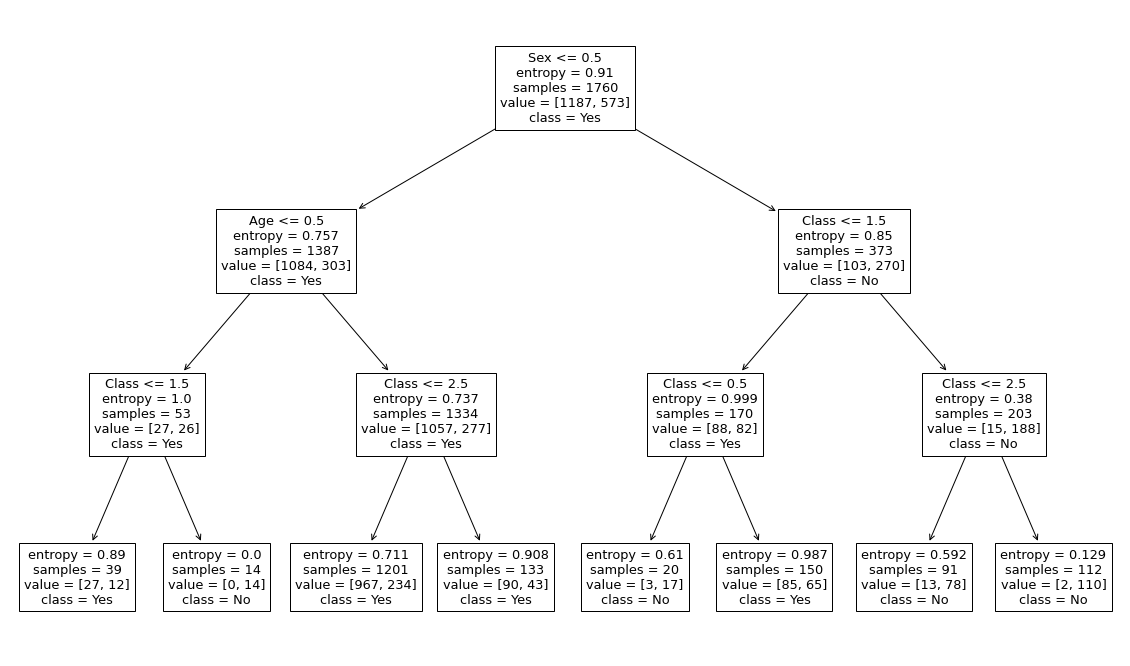

In [ ]:
dt_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_model.fit(training_features, training_targets)

plt.figure(figsize=(20,12))
tree.plot_tree(dt_model, feature_names=ti.columns[:3], class_names=['Yes', 'No'])
plt.show()

My False Negetives: 

Box with entropy = 0.61, first branch from class<=0.5 
  
  Box with entropy = 0.592, first branch from class<=2.5

My False Positives:

 Box with entropy = 0.737, second branch from age<=0.5

Box with entropy = 0.987, second branch from class<=0.5

Box with entropy = 0.908, second branch from class<=2.5



3) Produce a confusion matrix from the trees predictions on the test data. From the matrix calculate accuracy, precision, recall and f1 score. Look back at the tree and identify which branches resulted in false positives or false negatives. (You can include this commentary in a markdown cell).


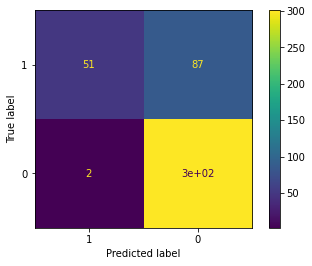

In [ ]:
plot_confusion_matrix(dt_model, testing_features, testing_targets, labels=[1,0])

In [ ]:
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(dt_model, training_features, training_targets, scoring=scoring, return_train_score=True, cv=5)
scores

{'fit_time': array([0.00581002, 0.00192761, 0.00192451, 0.00184655, 0.00185704]),
 'score_time': array([0.00482488, 0.00385642, 0.0036006 , 0.00667119, 0.0036068 ]),
 'test_accuracy': array([0.77840909, 0.80681818, 0.76988636, 0.79545455, 0.77840909]),
 'test_f1': array([0.52439024, 0.59036145, 0.47741935, 0.55      , 0.5125    ]),
 'test_precision': array([0.86      , 0.94230769, 0.925     , 0.97777778, 0.91111111]),
 'test_recall': array([0.37719298, 0.42982456, 0.32173913, 0.3826087 , 0.35652174]),
 'train_accuracy': array([0.79119318, 0.78409091, 0.79332386, 0.78693182, 0.78409091]),
 'train_f1': array([0.54489164, 0.52795031, 0.55572519, 0.53846154, 0.525     ]),
 'train_precision': array([0.94117647, 0.91891892, 0.92385787, 0.91145833, 0.92307692]),
 'train_recall': array([0.38344227, 0.37037037, 0.39737991, 0.38209607, 0.36681223])}

4) Build a second decision tree. This tree will be restricted to have a max-depth of one. This pre-pruning results in a much smaller tree. Output a graph of this tree.


In [ ]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.05)
dt_model.fit(training_features, training_targets)
scores = cross_validate(dt_model, training_features, training_targets, scoring='accuracy', return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time       0.002022
score_time     0.001031
test_score     0.769318
train_score    0.769318
dtype: float64

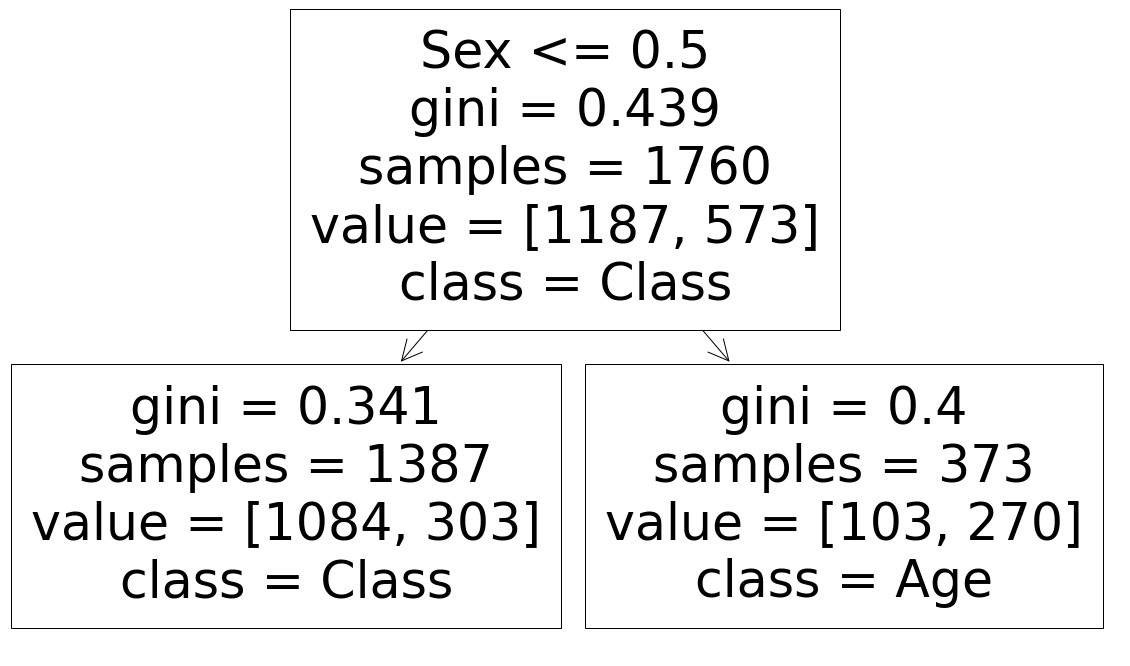

In [ ]:
plt.figure(figsize=(20,12))
plot_tree(dt_model, feature_names=ti.columns[:-1], class_names=['Class', 'Age','Sex','Survived'])
plt.show()

5) Produce a confusion matrix and calculate the same performance measures for this second tree. How much better or worse is this tree (in terms of accuracy, precision, recall, f1 score)?

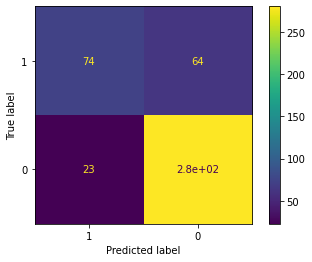

In [ ]:
plot_confusion_matrix(dt_model, testing_features, testing_targets, labels=[1, 0])

In [ ]:
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(dt_model, training_features, training_targets, scoring=scoring, return_train_score=True, cv=5)
scores

{'fit_time': array([0.00702477, 0.00206804, 0.00201654, 0.00208306, 0.00204659]),
 'score_time': array([0.00537825, 0.00363851, 0.00357556, 0.00352931, 0.00358248]),
 'test_accuracy': array([0.74147727, 0.77556818, 0.77556818, 0.76704545, 0.78693182]),
 'test_f1': array([0.53333333, 0.60301508, 0.57297297, 0.54945055, 0.59459459]),
 'test_precision': array([0.64197531, 0.70588235, 0.75714286, 0.74626866, 0.78571429]),
 'test_recall': array([0.45614035, 0.52631579, 0.46086957, 0.43478261, 0.47826087]),
 'train_accuracy': array([0.77627841, 0.76775568, 0.76775568, 0.76988636, 0.76491477]),
 'train_f1': array([0.58055925, 0.562249  , 0.57030223, 0.57591623, 0.56504599]),
 'train_precision': array([0.74657534, 0.72916667, 0.71617162, 0.71895425, 0.70957096]),
 'train_recall': array([0.47494553, 0.45751634, 0.47379913, 0.48034934, 0.46943231])}

accuracy - decrease
precision - decrease
recall - increase 
f1 - increase

We can conclude, accuracy and presion is worse and recall and f1 is better.